In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../data/housing-data.csv")

In [4]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


In [6]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB1D32FE48>], dtype=object)

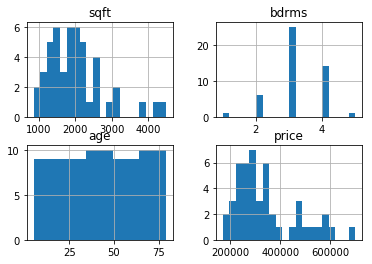

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2)
df.hist(bins=20, column="sqft", ax = ax[0][0])
df.hist(bins=20, column="bdrms", ax = ax[0][1])
df.hist(bins=5, column="age", ax = ax[1][0])
df.hist(bins=20, column="price", ax = ax[1][1])

In [9]:
X = np.column_stack((df["sqft"].values, df["bdrms"].values, df["age"].values))

In [10]:
y = df["price"].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import Dense

In [119]:
def buildModel(X, y):
    model = Sequential()
    model.add(Dense(1, input_shape=(3,)))
    model.compile(SGD(lr=0.05), "mean_squared_error")
    model.fit(X, y, epochs=100, verbose=False)
    return model

In [120]:
model = buildModel(X_train, y_train)

In [121]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [123]:
X_mms = mms.fit_transform(X)
y_s = y / 100000

C:\Users\liviu\Anaconda3\envs\ztdl\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [122]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()


In [124]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_mms, y_s, test_size=0.2)

In [125]:
model2 = buildModel(X_train_s, y_train_s)
y_pred_train_s = model2.predict(X_train_s)
y_pred_test_s = model2.predict(X_test_s)

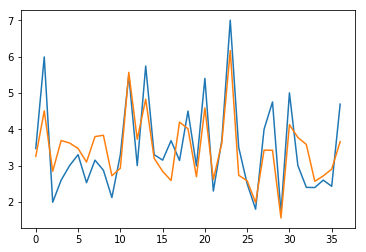

In [126]:
plt.plot(y_train_s)
plt.plot(y_pred_train_s)
plt.

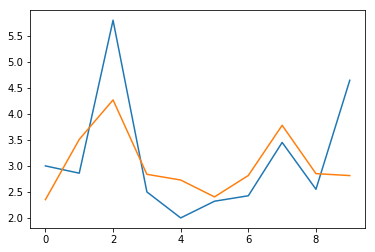

In [127]:
plt.plot(y_test_s)
plt.plot(y_pred_test_s)

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [129]:
mean_squared_error(y_pred_train_s, y_train_s)

0.51786454026983686

In [130]:
mean_squared_error(y_pred_test_s, y_test_s)

0.75473721187751774

In [131]:
print("Train: ", r2_score(y_train_s, y_pred_train_s))
print("Test: ", r2_score(y_test_s, y_pred_test_s))

Train:  0.671657502653
Test:  0.409098154294
